<a href="https://colab.research.google.com/github/ayush-kumar-rai/SEVEN7CODE-TECHNOLOGIES/blob/Titanic_Classification/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Classification**

About the Dataset On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### **Objective:**

Understand the Dataset & cleanup (if required). Build a strong classification model to predict whether the passenger survives or not. Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

# Data Preparation

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [171]:
titanic = pd.read_csv('/content/Titanic-Dataset.csv')

In [172]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [173]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [175]:
titanic.shape

(891, 12)

In [176]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Preprocessing and Data Cleaning

In [177]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [178]:
titanic.duplicated().sum()

0

Checking for null values

In [179]:
nv = titanic.isna().sum().sort_values(ascending=False)
nv = nv[nv>0]
nv

Cabin       687
Age         177
Embarked      2
dtype: int64

Checking what is the percentage column contain missing values

In [180]:
titanic.isnull().sum().sort_values(ascending=False)*100/len(titanic)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [181]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Filling Null Values in Age column with mean values of age column

Filling null values in Embarked Column with mode values of embarked column

In [182]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [183]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Finding number of unique values in each column of dataset

In [184]:
titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [185]:
titanic['Survived'].unique()

array([0, 1])

In [186]:
titanic['Pclass'].unique()

array([3, 1, 2])

In [187]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [188]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [189]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [190]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [191]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
titanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,646


#  Data Visualization

In [193]:
d1 = titanic['Sex'].value_counts()
d1

male      577
female    314
Name: Sex, dtype: int64

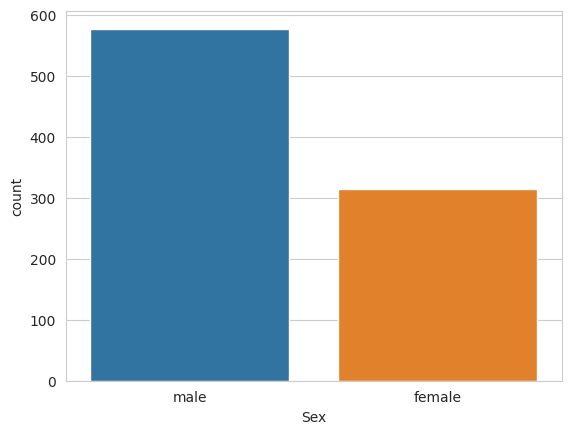

In [194]:
sns.countplot(x=titanic['Sex'])
plt.show()

Plotting Percantage Distribution of Sex Column

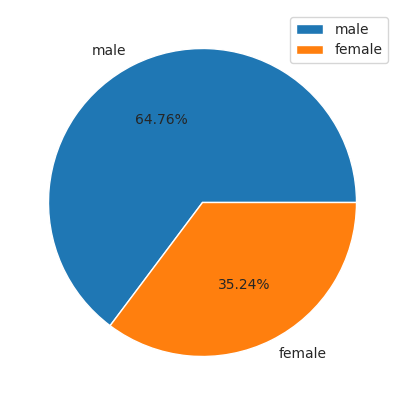

In [195]:
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()

Showing Distribution of Sex Column Survived Wise

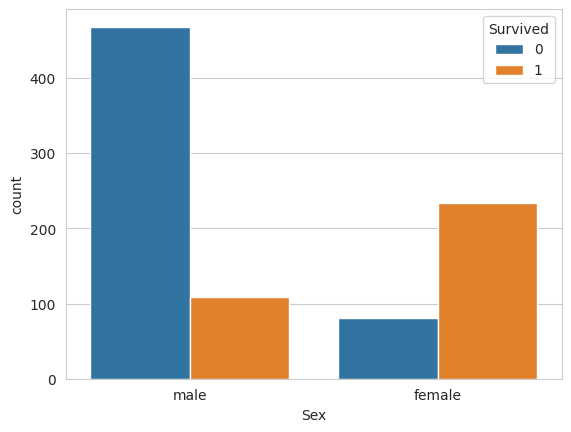

In [196]:
sns.countplot(x=titanic['Sex'],hue=titanic['Survived'])
plt.show()

In Sex
> 0 represents female        
>1 represents male

 Showing Distribution of Embarked Sex wise

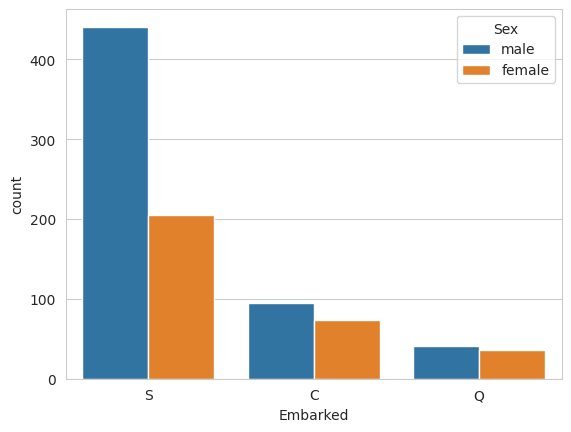

In [197]:
sns.countplot(x=titanic['Embarked'],hue=titanic['Sex'])
plt.show()

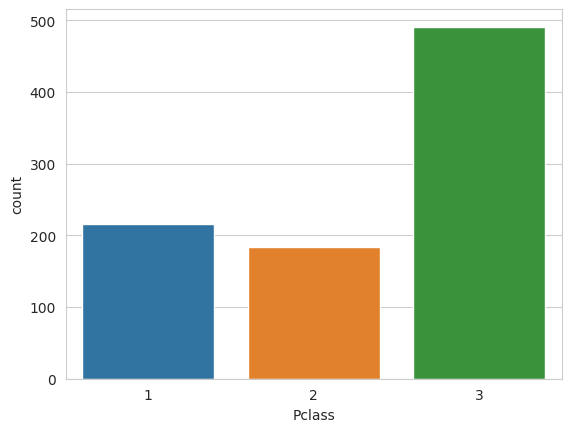

In [198]:
sns.countplot(x=titanic['Pclass'])
plt.show()

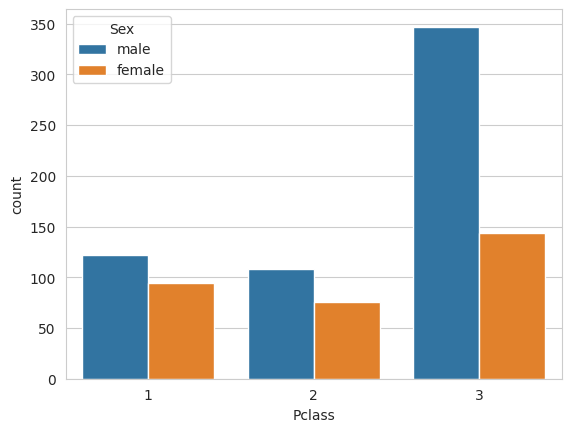

In [199]:
sns.countplot(x=titanic['Pclass'],hue=titanic['Sex'])
plt.show()

Age Distribution

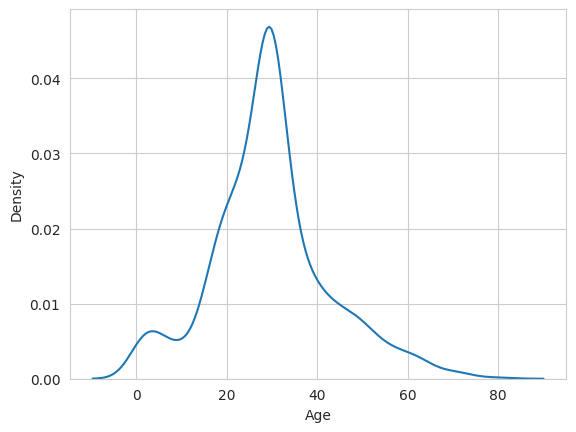

In [200]:
sns.kdeplot(x=titanic['Age'])
plt.show()

0    549
1    342
Name: Survived, dtype: int64


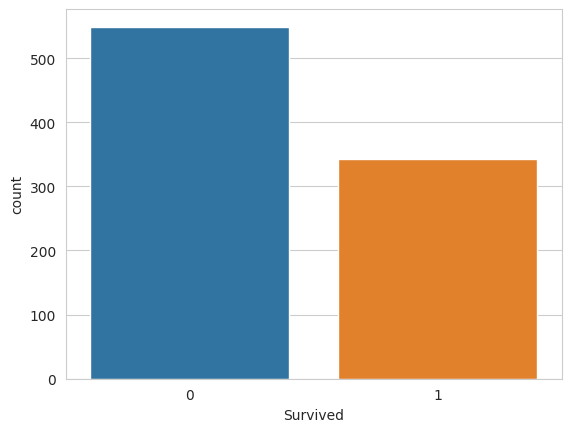

In [201]:
print(titanic['Survived'].value_counts())
sns.countplot(x=titanic['Survived'])
plt.show()

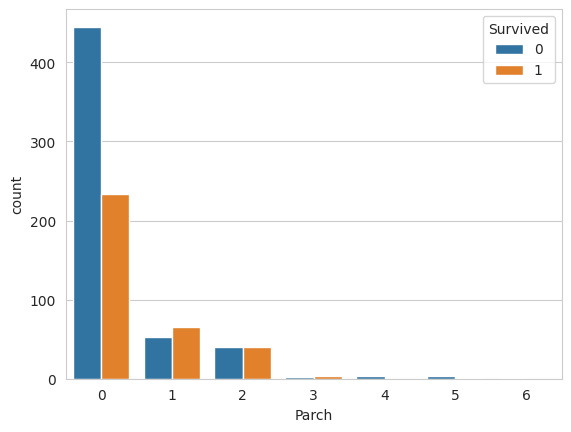

In [202]:
sns.countplot(x=titanic['Parch'],hue=titanic['Survived'])
plt.show()

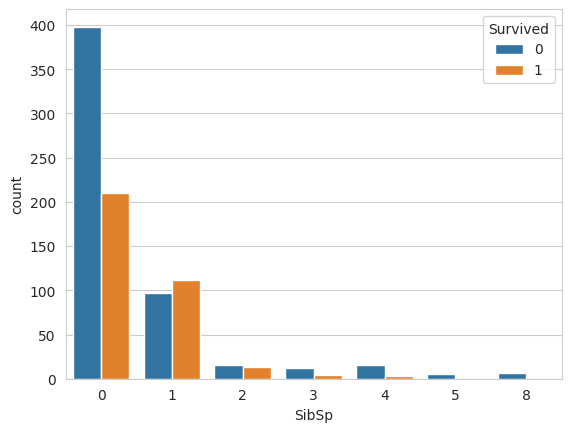

In [203]:
sns.countplot(x=titanic['SibSp'],hue=titanic['Survived'])
plt.show()

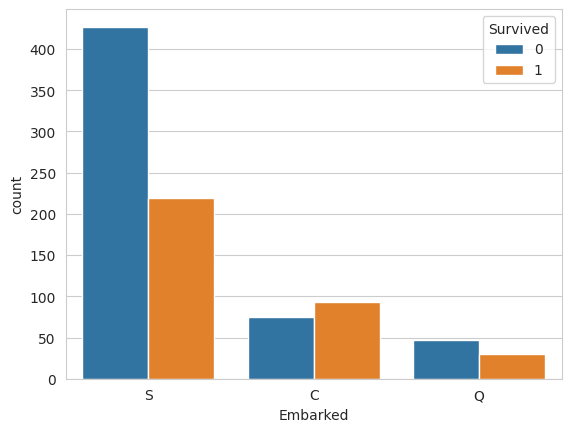

In [204]:
sns.countplot(x=titanic['Embarked'],hue=titanic['Survived'])
plt.show()

Showing Distribution of Age Survived Wise

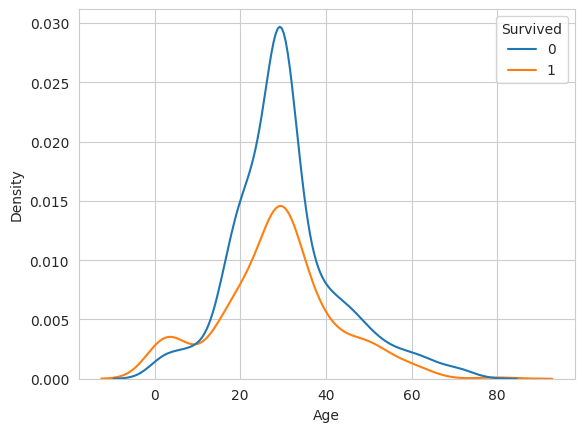

In [205]:
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

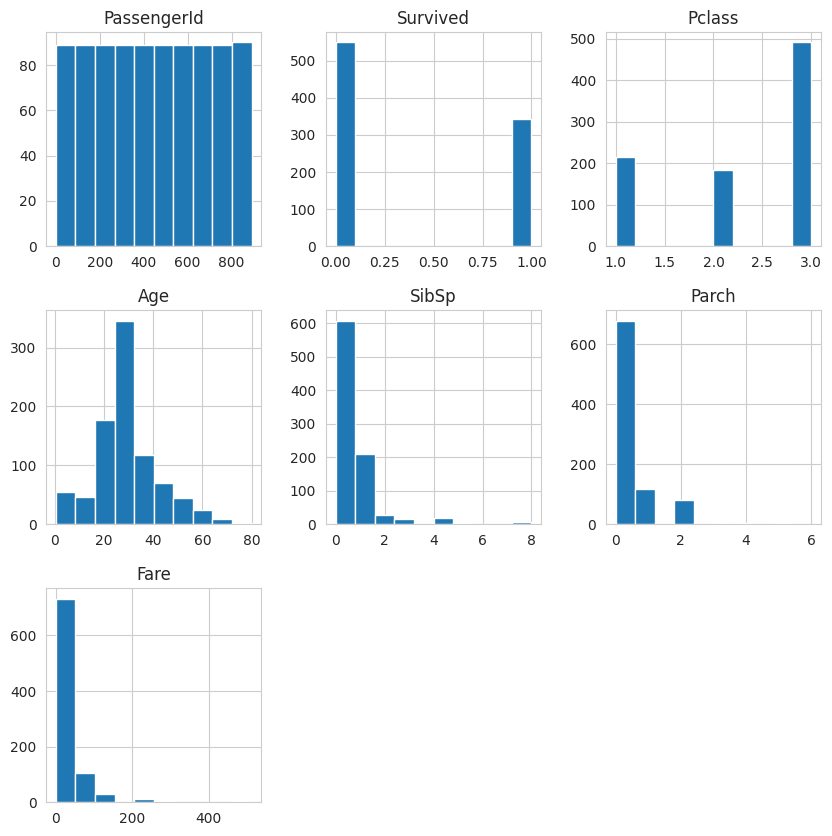

In [206]:
titanic.hist(figsize=(10,10))
plt.show()

 Plotting Boxplot for dataset

Checking for outliers



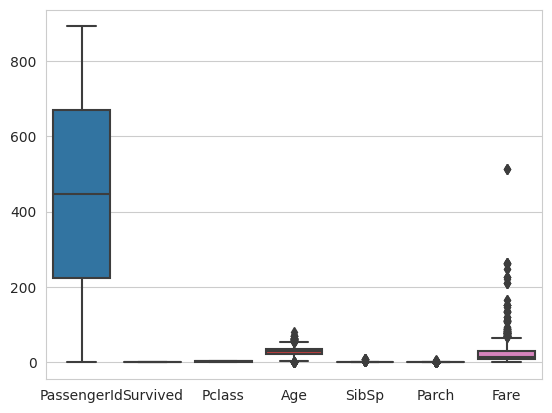

In [207]:
sns.boxplot(titanic)
plt.show()

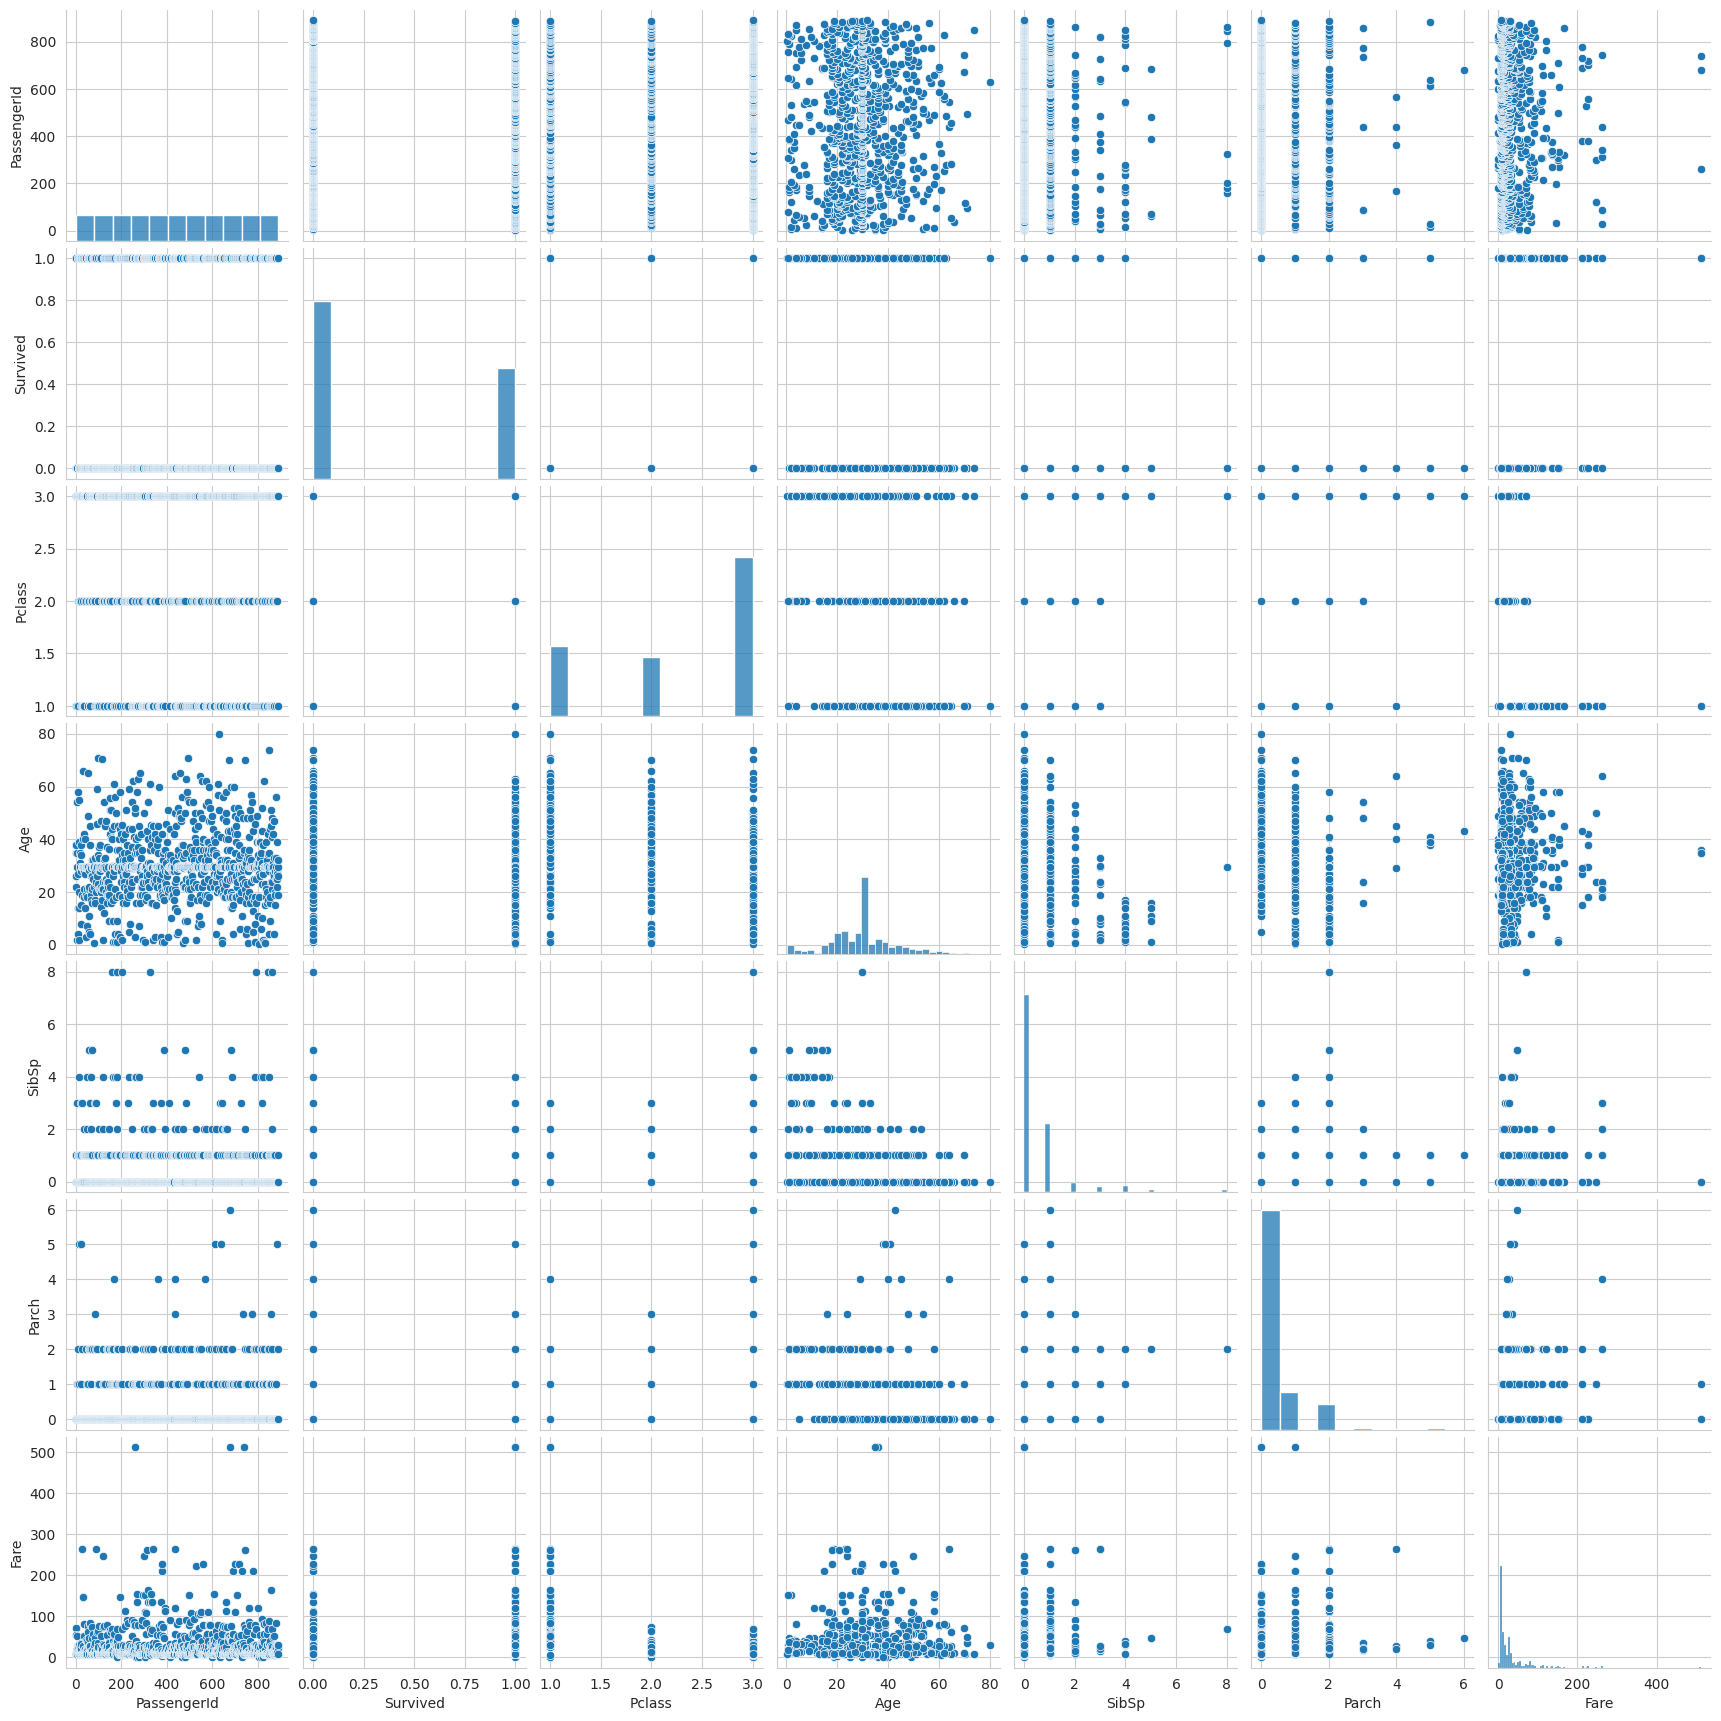

In [208]:
sns.pairplot(titanic)
plt.show()

# Checking the target variable

In [209]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

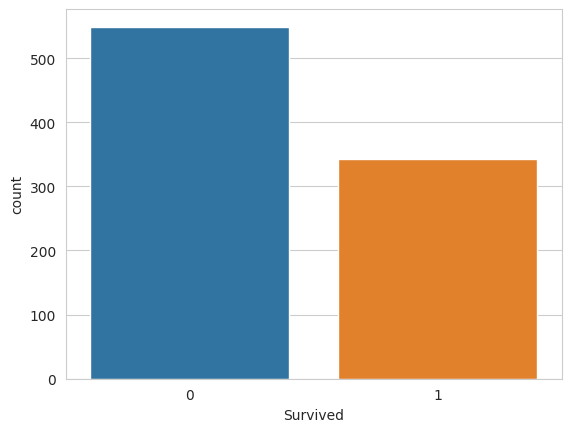

In [210]:
sns.countplot(x=titanic['Survived'])
plt.show()

# Label Encoding

In [211]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    titanic[column] = le.fit_transform(titanic[column])

titanic.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In Sex Column

> 0 represents female  
> 1 represents Male

In Embarked Column

> 0 represents C   
> 1 represents Q  
> 2 represents S

# Data Modelling

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Selecting the independent and dependent features

In [213]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[cols]
y = titanic['Survived']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [214]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [215]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Train_Test_Split

In [216]:
print(891*0.10)

89.10000000000001


In [217]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


# Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy)

In [218]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

###Building the **Logistic Regression Model**

In [219]:
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Computing Training and Testing score

In [220]:
mscore(lr)

Training Score 0.8052434456928839
Testing Score 0.7666666666666667


## Generating Prediction

In [221]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


## Evaluate the model - confusion matrix, classification Report, Accuracy score

In [222]:
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[46  7]
 [14 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


## Building the **knn Classifier Model**

In [223]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [224]:
mscore(knn)

Training Score 0.7752808988764045
Testing Score 0.6777777777777778


In [225]:
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [226]:
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[47  6]
 [23 14]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        53
           1       0.70      0.38      0.49        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.63        90
weighted avg       0.68      0.68      0.65        90

Accuracy Score 0.6777777777777778


## Building **Support Vector Classifier Model**


In [227]:
svc = SVC(C=1.0)
svc.fit(x_train, y_train)


SVC()

In [228]:
mscore(svc)

Training Score 0.6891385767790262
Testing Score 0.6333333333333333


In [229]:
ypred_svc = svc.predict(x_test)
print(ypred_svc)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [230]:
cls_eval(y_test,ypred_svc)
acc_svc = accuracy_score(y_test,ypred_svc)
print('Accuracy Score',acc_svc)

Confusion Matrix
 [[48  5]
 [28  9]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.91      0.74        53
           1       0.64      0.24      0.35        37

    accuracy                           0.63        90
   macro avg       0.64      0.57      0.55        90
weighted avg       0.64      0.63      0.58        90

Accuracy Score 0.6333333333333333


## Building the **RandomForest Classifier Model**


In [231]:
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [232]:
mscore(rfc)

Training Score 0.9225967540574282
Testing Score 0.7666666666666667


In [233]:
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [234]:
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[47  6]
 [15 22]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.79      0.59      0.68        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


## Building the **DecisionTree Classifier Model**

In [235]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [236]:
mscore(dt)

Training Score 0.8526841448189763
Testing Score 0.7777777777777778


In [237]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [238]:
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


In [239]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','SVC','Random Forest Classifier','Decision Tree Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Decision Tree Classifier,0.777778
0,Logistic Regression,0.766667
3,Random Forest Classifier,0.766667
1,knn,0.677778
2,SVC,0.633333


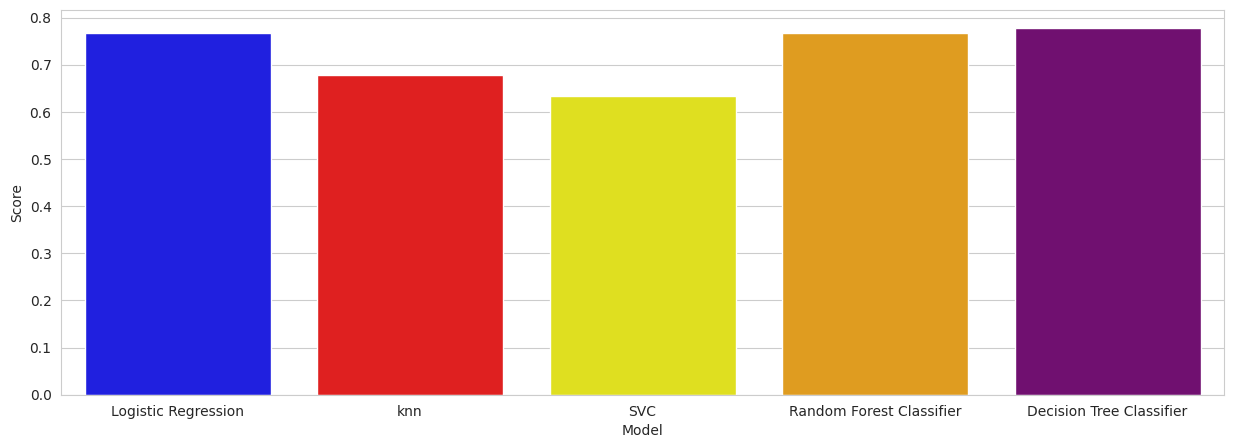

In [240]:
colors = ["blue", "red", "yellow","orange","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()
